<a href="https://colab.research.google.com/github/Moni318/Actividad-1/blob/main/Actividad1_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#*Nulos y outliers*

In [269]:
df=pd.read_csv("listings (3).csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3168,https://www.airbnb.com/rooms/3168,20220915162158,2022-09-15,city scrape,TudorStudio,"The ""Studio at 14 Weldon"" is located in Newton...","Newton has 13 unique villages, and gives off a...",https://a0.muscache.com/pictures/ff7952dc-ef0b...,3697,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,3781,https://www.airbnb.com/rooms/3781,20220915162158,2022-09-15,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.87,4.91,NaN,f,1,1,0,0,0.26
2,5506,https://www.airbnb.com/rooms/5506,20220915162158,2022-09-15,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.89,4.54,4.73,Approved by the government,f,10,10,0,0,0.69
3,6695,https://www.airbnb.com/rooms/6695,20220915162158,2022-09-15,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.95,4.50,4.71,STR446650,f,10,10,0,0,0.75
4,7903,https://www.airbnb.com/rooms/7903,20220915162158,2022-09-15,city scrape,"Colorful, modern 2 BR apt shared with host",I'm a high school teacher and frequent travele...,"The apartment is in Somerville, located direct...",https://a0.muscache.com/pictures/miso/Hosting-...,14169,...,4.95,4.56,4.80,NaN,f,1,0,1,0,1.84


In [270]:
df=df.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_about','host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates','bathrooms_text','minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90','calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review','review_scores_accuracy','review_scores_checkin', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count','bathrooms',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month','host_response_time','host_is_superhost','bedrooms','beds','amenities','host_location','host_response_rate'], axis=1)

In [271]:
df.isnull().sum()

id                                0
host_acceptance_rate            550
property_type                     0
room_type                         0
price                             0
availability_365                  0
number_of_reviews                 0
review_scores_rating           1225
review_scores_cleanliness      1235
review_scores_communication    1235
dtype: int64

In [272]:
df.shape

(5185, 10)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5185 non-null   int64  
 1   host_acceptance_rate         4635 non-null   object 
 2   property_type                5185 non-null   object 
 3   room_type                    5185 non-null   object 
 4   price                        5185 non-null   object 
 5   availability_365             5185 non-null   int64  
 6   number_of_reviews            5185 non-null   int64  
 7   review_scores_rating         3960 non-null   float64
 8   review_scores_cleanliness    3950 non-null   float64
 9   review_scores_communication  3950 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 405.2+ KB


In [274]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")

In [275]:
df["host_acceptance_rate"].fillna(method='bfill')

0         0
1        30
2       100
3       100
4        97
       ... 
5180     99
5181     99
5182     99
5183     99
5184     99
Name: host_acceptance_rate, Length: 5185, dtype: object

In [276]:
df["host_acceptance_rate"].fillna(method='ffill')

0         0
1        30
2       100
3       100
4        97
       ... 
5180     99
5181     99
5182     99
5183     99
5184     99
Name: host_acceptance_rate, Length: 5185, dtype: object

In [277]:
df.dropna(subset=['host_acceptance_rate'],how='all',inplace=True)

In [278]:
df['host_acceptance_rate']=df['host_acceptance_rate'].astype(int)

In [279]:
df.isnull().sum()

id                                0
host_acceptance_rate              0
property_type                     0
room_type                         0
price                             0
availability_365                  0
number_of_reviews                 0
review_scores_rating           1085
review_scores_cleanliness      1086
review_scores_communication    1086
dtype: int64

In [280]:
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [281]:
df['price']=df['price'].astype(float)

In [282]:
df['review_scores_rating']=df['review_scores_rating'].astype(float)

In [283]:
a=df['review_scores_rating'].median()

In [284]:
df['review_scores_rating']=df['review_scores_rating'].fillna(4.85)

In [285]:
df['review_scores_cleanliness']=df['review_scores_cleanliness'].astype(float)

In [286]:
c=df['review_scores_cleanliness'].median()

In [287]:
df['review_scores_cleanliness']=df['review_scores_cleanliness'].fillna(c)

In [288]:
df['review_scores_communication']=df['review_scores_communication'].astype(float)

In [289]:
d=df['review_scores_communication'].median()

In [290]:
df['review_scores_communication']=df['review_scores_communication'].fillna(d)

In [291]:
df.isnull().sum()

id                             0
host_acceptance_rate           0
property_type                  0
room_type                      0
price                          0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
dtype: int64

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 5184
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4635 non-null   int64  
 1   host_acceptance_rate         4635 non-null   int64  
 2   property_type                4635 non-null   object 
 3   room_type                    4635 non-null   object 
 4   price                        4635 non-null   float64
 5   availability_365             4635 non-null   int64  
 6   number_of_reviews            4635 non-null   int64  
 7   review_scores_rating         4635 non-null   float64
 8   review_scores_cleanliness    4635 non-null   float64
 9   review_scores_communication  4635 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 398.3+ KB


In [293]:
df['room_type'].value_counts()

Entire home/apt    3096
Private room       1509
Hotel room           21
Shared room           9
Name: room_type, dtype: int64

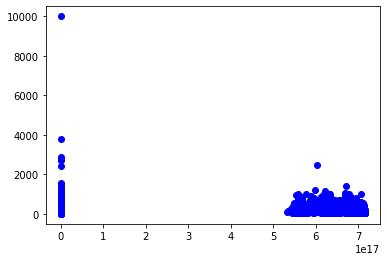

In [294]:
x=df.id
y=df.price
plt.scatter(x, y, c ="blue")
plt.show()

In [295]:
df2=df[df['price']<1500]

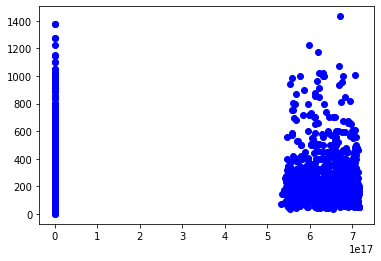

In [296]:
x=df2.id
y=df2.price
plt.scatter(x, y, c ="blue")
plt.show()

In [297]:
df2['room_type'].value_counts()

Entire home/apt    3090
Private room       1508
Hotel room           19
Shared room           9
Name: room_type, dtype: int64

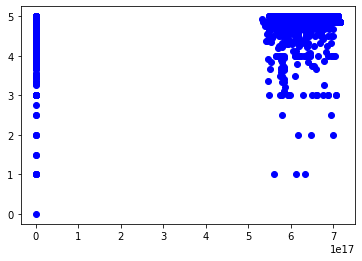

In [298]:
x=df2.id
y=df2.review_scores_rating
plt.scatter(x, y, c ="blue")
plt.show()

In [299]:
df3=df2[df2['review_scores_rating']>2]

In [300]:
df3['room_type'].value_counts()

Entire home/apt    3082
Private room       1499
Hotel room           19
Shared room           9
Name: room_type, dtype: int64

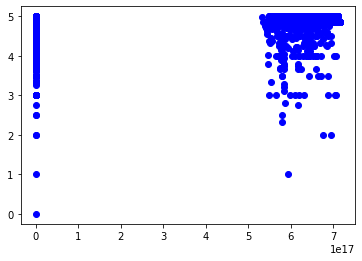

In [301]:
x=df3.id
y=df3.review_scores_cleanliness
plt.scatter(x, y, c ="blue")
plt.show()

In [302]:
df4=df3[df3['review_scores_cleanliness']>2]

In [303]:
df4['room_type'].value_counts()

Entire home/apt    3079
Private room       1495
Hotel room           19
Shared room           9
Name: room_type, dtype: int64

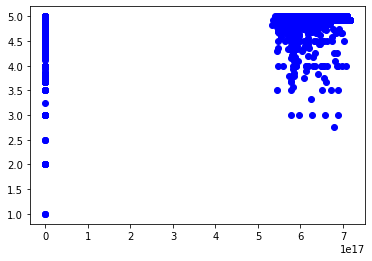

In [304]:
x=df4.id
y=df4.review_scores_communication
plt.scatter(x, y, c ="blue")
plt.show()

In [305]:
df5=df4[df4['review_scores_communication']>3]

In [306]:
df5['room_type'].value_counts()

Entire home/apt    3053
Private room       1479
Hotel room           19
Shared room           9
Name: room_type, dtype: int64

#*Analisis*

In [307]:
Entire_Apt=df5[df5['room_type']=='Entire home/apt']
Private=df5[df5['room_type']=='Private room']
Shared=df5[df5['room_type']=='Shared room']
Hotel=df5[df5['room_type']=='Hotel room']

In [308]:
Entirecorr=Entire_Apt.corr()

In [309]:
Privatecorr=Private.corr()

In [310]:
Sharedcorr=Shared.corr()

In [311]:
Hotelcorr=Hotel.corr()

#*Entire room*

In [312]:
Entirecorr['number_of_reviews']

id                            -0.301164
host_acceptance_rate           0.153175
price                         -0.087898
availability_365              -0.158899
number_of_reviews              1.000000
review_scores_rating           0.010317
review_scores_cleanliness      0.063953
review_scores_communication    0.052148
Name: number_of_reviews, dtype: float64

In [313]:
X= Entire_Apt[['host_acceptance_rate','availability_365']]
y= Entire_Apt['number_of_reviews']

In [314]:
from sklearn.linear_model import LinearRegression

In [315]:
model= LinearRegression()

In [316]:
type(model)

sklearn.linear_model._base.LinearRegression

In [317]:
model.fit(X=X, y=y)

LinearRegression()

In [318]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'availability_365'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.66039817, -0.10369789]),
 '_residues': 21068990.062798068,
 'rank_': 2,
 'singular_': array([6545.44998449,  976.82597358]),
 'intercept_': 11.426766658978977}

In [319]:
model.score(X,y)

0.044133491818773685

In [320]:
y_pred= model.predict(X=Entire_Apt[['host_acceptance_rate','availability_365']])
y_pred

array([13.81746576, 72.8001783 , 71.34840781, ..., 43.96122964,
       52.47539137, 39.68233978])

In [321]:
Entire_Apt.insert(0, 'Predicciones', y_pred)
Entire_Apt

,Predicciones,id,host_acceptance_rate,property_type,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
1,13.817466,3781,30,Entire rental unit,Entire home/apt,132.0,168,23,4.96,4.96,4.96
2,72.800178,5506,100,Entire guest suite,Entire home/apt,149.0,45,113,4.78,4.89,4.89
3,71.348408,6695,100,Entire condo,Entire home/apt,179.0,59,119,4.80,4.86,4.95
5,43.513634,8521,88,Entire rental unit,Entire home/apt,300.0,251,50,4.76,4.96,4.91
6,19.542839,8789,55,Entire rental unit,Entire home/apt,110.0,272,25,4.64,4.56,4.96
...,...,...,...,...,...,...,...,...,...,...,...
5174,38.154148,714906239224334877,97,Entire rental unit,Entire home/apt,219.0,360,0,4.85,4.85,4.93
5175,39.824248,715101662823777649,100,Entire condo,Entire home/apt,164.0,363,0,4.85,4.85,4.93
5176,43.961230,715658190467254169,97,Entire rental unit,Entire home/apt,142.0,304,0,4.85,4.85,4.93
5177,52.475391,715928214125152890,100,Entire home,Entire home/apt,185.0,241,0,4.85,4.85,4.93


#*Private room*

In [322]:
Privatecorr['number_of_reviews']

id                            -0.281814
host_acceptance_rate           0.218866
price                          0.003164
availability_365              -0.030487
number_of_reviews              1.000000
review_scores_rating           0.076739
review_scores_cleanliness      0.100771
review_scores_communication    0.075453
Name: number_of_reviews, dtype: float64

In [323]:
Xp= Private[['host_acceptance_rate','availability_365']]
yp= Private['number_of_reviews']

In [324]:
modelp= LinearRegression()

In [325]:
type(modelp)

sklearn.linear_model._base.LinearRegression

In [326]:
modelp.fit(X=Xp, y=yp)

LinearRegression()

In [327]:
modelp.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'availability_365'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.88576477, -0.0118215 ]),
 '_residues': 15343083.85879236,
 'rank_': 2,
 'singular_': array([4542.65080106,  984.04393313]),
 'intercept_': -16.021855770610998}

In [328]:
modelp.score(Xp,yp)

0.048079956985027206

In [329]:
y_predp= modelp.predict(X=Private[['host_acceptance_rate','availability_365']])
y_predp

array([-19.42644646,  69.7909339 ,  66.30444013, ...,  67.41311855,
        67.76776341,  67.68501294])

In [330]:
Private.insert(0, 'Predicciones', y_predp)
Private

,Predicciones,id,host_acceptance_rate,property_type,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,-19.426446,3168,0,Private room,Private room,99.0,288,0,4.85,4.85,4.93
4,69.790934,7903,97,Private room in condo,Private room,116.0,9,295,4.89,4.94,4.95
10,66.304440,19581,96,Private room in bed and breakfast,Private room,199.0,229,8,4.29,4.50,4.83
11,65.949795,27498,96,Private room in bed and breakfast,Private room,265.0,259,18,4.65,4.63,4.63
13,61.732911,40601,92,Private room in home,Private room,100.0,316,89,4.98,5.00,4.94
...,...,...,...,...,...,...,...,...,...,...,...
5180,67.685013,716081443145047239,99,Private room in rental unit,Private room,51.0,337,0,4.85,4.85,4.93
5181,67.413119,716081469166085329,99,Private room in rental unit,Private room,51.0,360,0,4.85,4.85,4.93
5182,67.413119,716081495310456299,99,Private room in rental unit,Private room,51.0,360,0,4.85,4.85,4.93
5183,67.767763,716235197792512391,99,Private room in rental unit,Private room,51.0,330,0,4.85,4.85,4.93


#*Shared*

In [331]:
Sharedcorr['number_of_reviews']

id                            -0.255156
host_acceptance_rate           0.173655
price                          0.028359
availability_365               0.169396
number_of_reviews              1.000000
review_scores_rating          -0.378830
review_scores_cleanliness     -0.264157
review_scores_communication   -0.073416
Name: number_of_reviews, dtype: float64

In [332]:
Xs= Shared[['host_acceptance_rate','availability_365','review_scores_cleanliness','review_scores_rating']]
ys= Shared['number_of_reviews']

In [333]:
models= LinearRegression()

In [334]:
type(models)

sklearn.linear_model._base.LinearRegression

In [335]:
models.fit(X=Xs, y=ys)

LinearRegression()

In [336]:
models.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'availability_365',
        'review_scores_cleanliness', 'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 3.14435900e-01,  1.56239109e-01,  1.45348370e+02, -3.60466824e+02]),
 '_residues': 104912.50109028157,
 'rank_': 4,
 'singular_': array([3.30301672e+02, 9.61095432e+01, 7.78493404e-01, 1.68619866e-01]),
 'intercept_': 1018.2075619236731}

In [337]:
models.score(Xs,ys)

0.19485118347928976

In [338]:
y_preds= models.predict(X=Shared[['host_acceptance_rate','availability_365','price','review_scores_rating']])
y_preds

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- review_scores_cleanliness

  warnings.warn(message, FutureWarning)


array([28326.58006916,  5858.15635435,  6576.89048319,  6398.99927551,
       13084.20520056, 12567.9019567 ,  4814.92701603, 13353.23708788,
       21247.25520296])

In [339]:
Shared.insert(0, 'Predicciones', y_preds)
Shared

,Predicciones,id,host_acceptance_rate,property_type,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication
251,28326.580069,3605045,50,Shared room in home,Shared room,200.0,162,5,5.00,5.00,5.00
1326,5858.156354,21240109,100,Shared room in rental unit,Shared room,45.0,103,0,4.85,4.85,4.93
1409,6576.890483,22629543,0,Shared room in condo,Shared room,50.0,253,0,4.85,4.85,4.93
1558,6398.999276,24644312,91,Shared room in home,Shared room,49.0,0,11,4.91,5.00,5.00
2729,13084.205201,45346226,95,Shared room in boutique hotel,Shared room,94.0,271,388,4.63,4.74,4.74
3242,12567.901957,49258187,92,Shared room in rental unit,Shared room,90.0,163,15,4.40,4.40,4.87
4053,4814.927016,552878688771211713,100,Shared room in rental unit,Shared room,38.0,284,1,5.00,5.00,5.00
4468,13353.237088,618880506823482988,99,Shared room in vacation home,Shared room,96.0,355,11,4.73,5.00,4.82
4936,21247.255203,685987715267213493,97,Shared room in rental unit,Shared room,151.0,341,1,5.00,5.00,4.00


#*Hotel*

In [340]:
Hotelcorr['number_of_reviews']

id                             0.046632
host_acceptance_rate           0.245028
price                          0.288211
availability_365               0.278630
number_of_reviews              1.000000
review_scores_rating          -0.419358
review_scores_cleanliness     -0.356093
review_scores_communication   -0.317691
Name: number_of_reviews, dtype: float64

In [341]:
Xh= Hotel[['host_acceptance_rate','availability_365','price','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
yh= Hotel['number_of_reviews']

In [342]:
modelh= LinearRegression()

In [343]:
type(modelh)

sklearn.linear_model._base.LinearRegression

In [344]:
modelh.fit(X=Xh, y=yh)

LinearRegression()

In [345]:
modelh.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'availability_365', 'price',
        'review_scores_rating', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-2.43794913e+00,  1.77518470e-02,  2.49701106e-01, -1.15119621e+02,
        -1.31456334e+02, -5.22412760e+01]),
 '_residues': 107170.84322617813,
 'rank_': 6,
 'singular_': array([7.59223976e+02, 2.95873880e+02, 1.41973871e+01, 9.18780656e-01,
        4.15480569e-01, 2.44921476e-01]),
 'intercept_': 1626.1713784171786}

In [346]:
modelh.score(Xh,yh)

0.272197433234189

In [347]:
y_predh= modelh.predict(X=Hotel[['host_acceptance_rate','availability_365','price','review_scores_rating','review_scores_cleanliness','review_scores_communication']])
y_predh

array([ 46.93260843,  36.32679388,  18.2654049 ,  76.28559599,
        29.08900106,  46.24612039, 155.98450942,  38.712528  ,
        23.64170243,  33.13269494,  18.16848147,  49.72767689,
        95.27998127, 108.93457068,  72.32007195,  80.90675442,
        -7.67973265, 157.40496916,  -7.67973265])

#*Coeficiente*

In [348]:
#Entire Room
coef_Deter=model.score(X=X,y=y)
coef_Deter

0.044133491818773685

In [349]:
#Entire Room
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21007972729126836

In [350]:
#Private Room
coef_DeterP=modelp.score(X=Xp,y=yp)
coef_DeterP

0.048079956985027206

In [351]:
#Private Room
coef_Correlp=np.sqrt(coef_DeterP)
coef_Correlp

0.21927142309253891

In [352]:
#Shared Room
coef_Deters=models.score(X=Xs,y=ys)
coef_Deters

0.19485118347928976

In [353]:
#Shared Room
coef_Correls=np.sqrt(coef_Deters)
coef_Correls

0.4414195096269418

In [354]:
#Hotel Room
coef_Deterh=modelh.score(X=Xh,y=yh)
coef_Deterh

0.272197433234189

In [355]:
#Hotel Room
coef_Correlh=np.sqrt(coef_Deterh)
coef_Correlh

0.5217254385538327

In [356]:
Tabla = pd.DataFrame()

In [357]:
Tabla['Tipo de habitacion'] = ['Entire room/apt', 'Private room', 'Shared room', 'Hotel room']
Tabla['Coef_det']=[coef_Deter,coef_DeterP,coef_Deters,coef_Deterh]
Tabla['Coef_Correl']=[coef_Correl,coef_Correlp,coef_Correls,coef_Correlh]

In [358]:
Tabla

,Tipo de habitacion,Coef_det,Coef_Correl
0,Entire room/apt,0.044133,0.210080
1,Private room,0.048080,0.219271
2,Shared room,0.194851,0.441420
3,Hotel room,0.272197,0.521725
